
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime



In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': []}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        loss =  loss_A + loss_B + loss_C 
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append(  loss_A.item()  )
        history['loss_B'].append(  loss_B.item()  )
        history['loss_C'].append(  loss_C.item()  )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.084775447845459
seq length of pred =  15
500 train loss =  0.07391222566366196
seq length of pred =  15
1000 train loss =  0.03143702447414398
seq length of pred =  15
1500 train loss =  0.018078316003084183
seq length of pred =  15
2000 train loss =  0.012069922871887684
seq length of pred =  15
2500 train loss =  0.01357976347208023
seq length of pred =  15


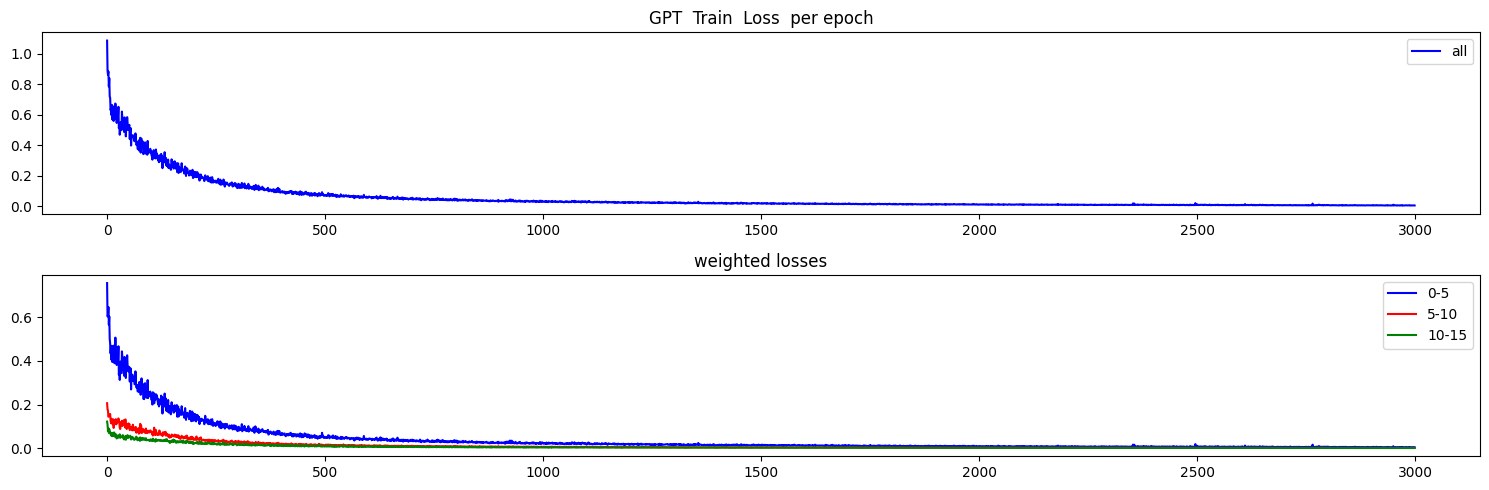

max tokens  14
torch.Size([1, 5, 27])
(19,)
(19,)
Test MSE Loss - SI only:  0.07502008229494095
Test MSE Loss - SI only 0-5:  0.08470474928617477
Test MSE Loss - SI only 5-10:  0.07807046920061111
Test MSE Loss - SI only 10-15:  0.018466349691152573
mae, mse, rmse, mape, mspe, rse, corr
(0.23480621, 0.07502008, 0.27389795, 4.9897323, 176.10799, 1.2875984)
Testing R**2 - SI only:  -0.6579095107997053
Testing R**2 - SI only:  -0.6579095107997053
Testing R**2 - All features:  0.9813936214300368


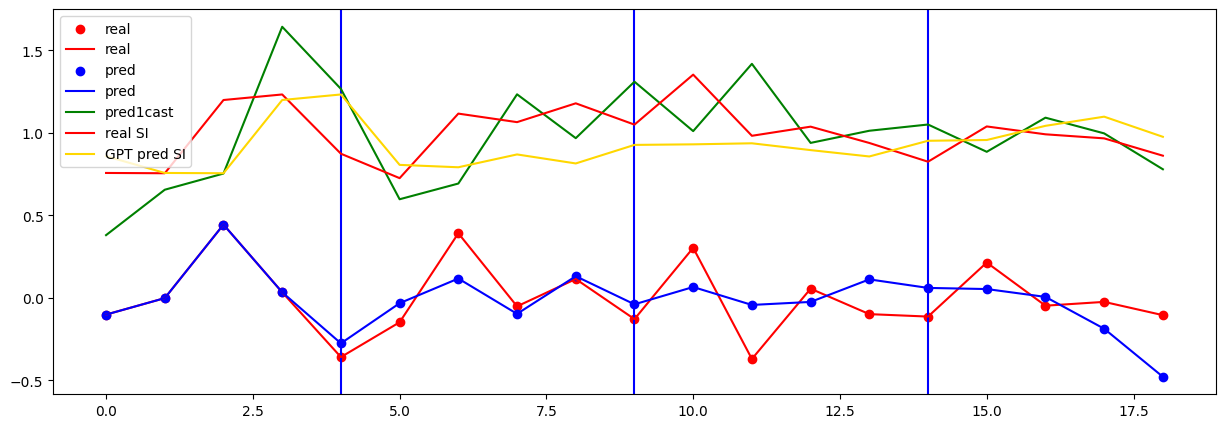

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0802384614944458
seq length of pred =  15
500 train loss =  0.15568383038043976
seq length of pred =  15
1000 train loss =  0.06880000233650208
seq length of pred =  15
1500 train loss =  0.04500383883714676
seq length of pred =  15
2000 train loss =  0.027854666113853455
seq length of pred =  15
2500 train loss =  0.01673758774995804
seq length of pred =  15


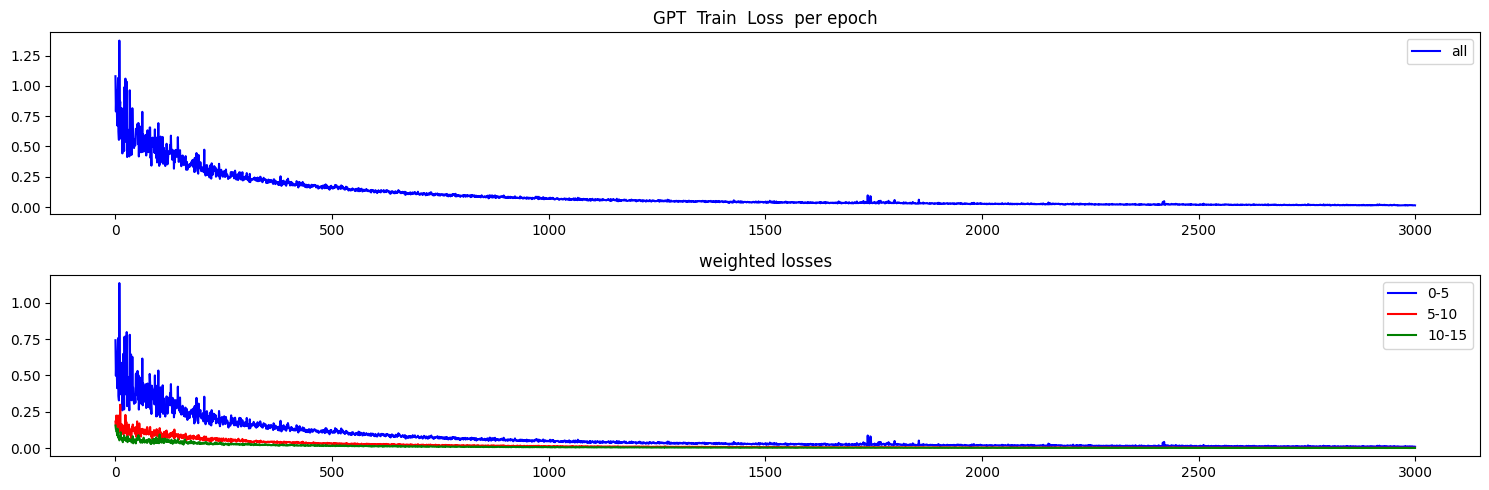

max tokens  14
torch.Size([1, 5, 27])
(19,)
(19,)
Test MSE Loss - SI only:  0.09584863483905792
Test MSE Loss - SI only 0-5:  0.12303467839956284
Test MSE Loss - SI only 5-10:  0.08714347332715988
Test MSE Loss - SI only 10-15:  0.05021192878484726
mae, mse, rmse, mape, mspe, rse, corr
(0.25684738, 0.09584864, 0.30959433, 5.188646, 178.23997, 1.4554077)
Testing R**2 - SI only:  -1.11821099613906
Testing R**2 - SI only:  -1.11821099613906
Testing R**2 - All features:  0.9396481529633413


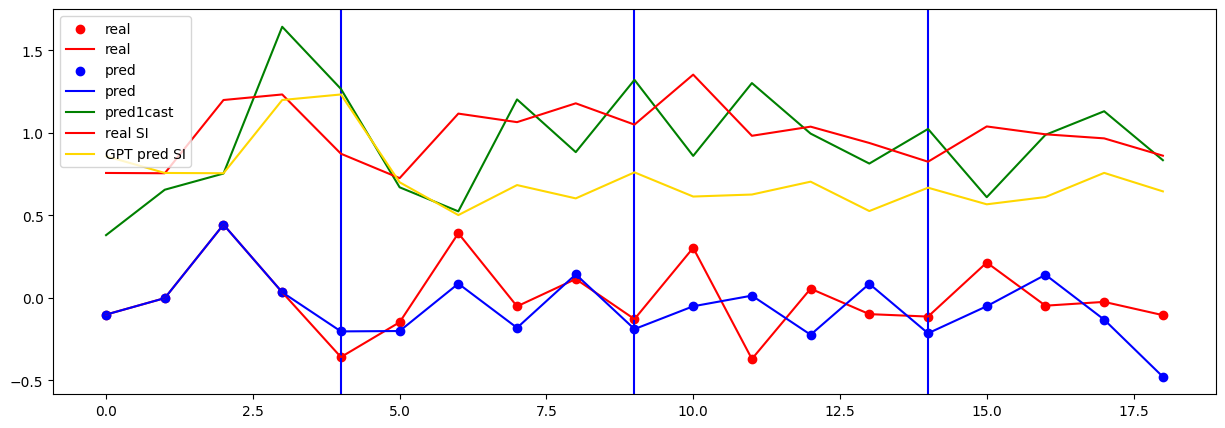

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.4411804676055908
seq length of pred =  15
500 train loss =  0.21244771778583527
seq length of pred =  15
1000 train loss =  0.10720261186361313
seq length of pred =  15
1500 train loss =  0.07013549655675888
seq length of pred =  15
2000 train loss =  0.05753925070166588
seq length of pred =  15
2500 train loss =  0.03891606628894806
seq length of pred =  15


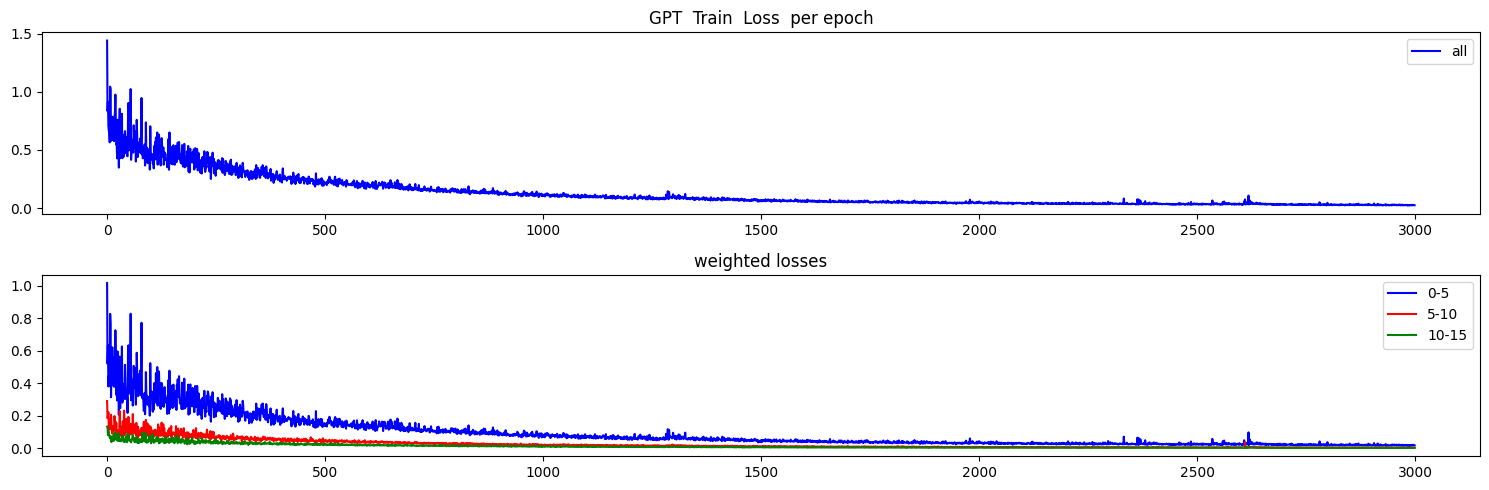

max tokens  14
torch.Size([1, 5, 27])
(19,)
(19,)
Test MSE Loss - SI only:  0.08608050644397736
Test MSE Loss - SI only 0-5:  0.11158738285303116
Test MSE Loss - SI only 5-10:  0.076370969414711
Test MSE Loss - SI only 10-15:  0.03531284257769585
mae, mse, rmse, mape, mspe, rse, corr
(0.24815494, 0.08608051, 0.2933948, 5.203149, 178.67094, 1.3792535)
Testing R**2 - SI only:  -0.9023398937504872
Testing R**2 - SI only:  -0.9023398937504872
Testing R**2 - All features:  0.9564727328622503


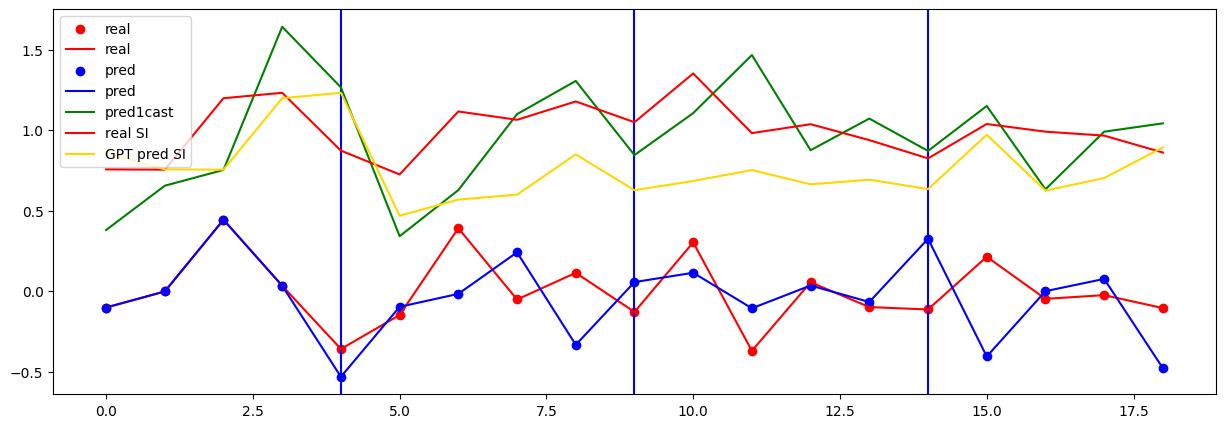

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  0.9497145414352417
seq length of pred =  15
500 train loss =  0.280082643032074
seq length of pred =  15
1000 train loss =  0.14053845405578613
seq length of pred =  15
1500 train loss =  0.08839151263237
seq length of pred =  15
2000 train loss =  0.059051673859357834
seq length of pred =  15
2500 train loss =  0.05398057773709297
seq length of pred =  15


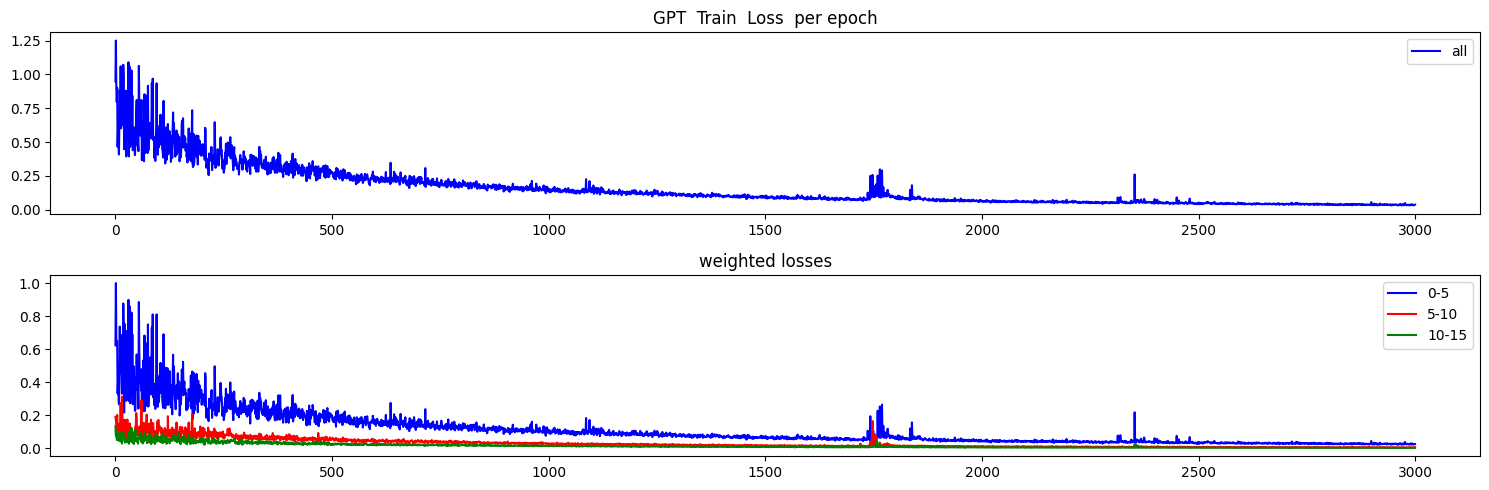

max tokens  14
torch.Size([1, 5, 27])
(19,)
(19,)
Test MSE Loss - SI only:  0.10015138983726501
Test MSE Loss - SI only 0-5:  0.20882382988929749
Test MSE Loss - SI only 5-10:  0.04666101932525635
Test MSE Loss - SI only 10-15:  0.021255701780319214
mae, mse, rmse, mape, mspe, rse, corr
(0.25493962, 0.1001514, 0.31646705, 5.214807, 177.61739, 1.4877166)
Testing R**2 - SI only:  -1.213299882768922
Testing R**2 - SI only:  -1.213299882768922
Testing R**2 - All features:  0.9579617553783593


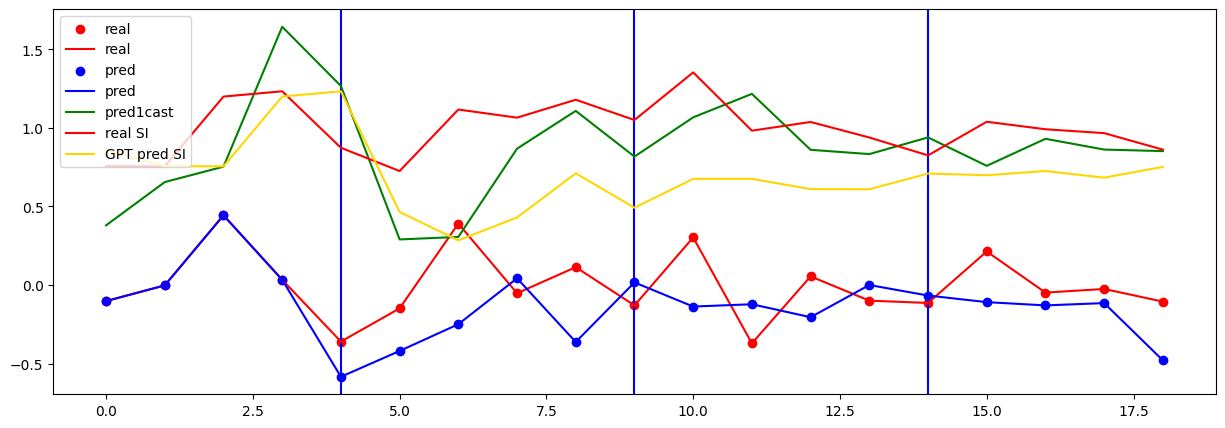

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  1.2881922721862793
seq length of pred =  15
500 train loss =  0.08877629041671753
seq length of pred =  15
1000 train loss =  0.0391291007399559
seq length of pred =  15
1500 train loss =  0.02072666585445404
seq length of pred =  15
2000 train loss =  0.01812167838215828
seq length of pred =  15
2500 train loss =  0.01045241393148899
seq length of pred =  15


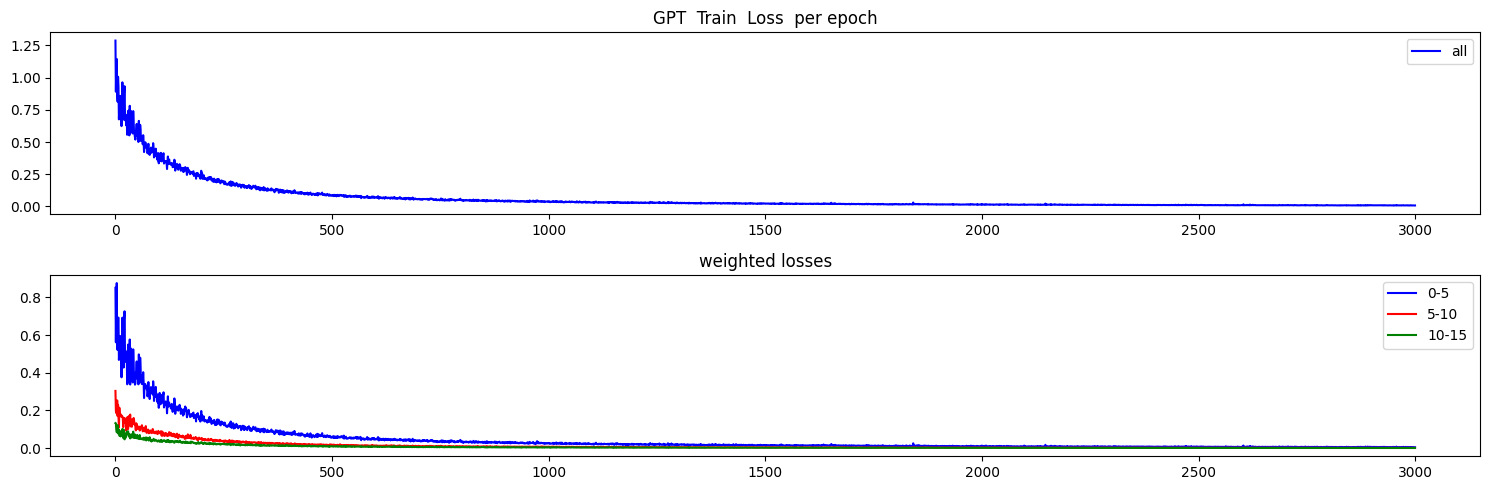

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.05401819199323654
Test MSE Loss - SI only 0-5:  0.043194375932216644
Test MSE Loss - SI only 5-10:  0.029352683573961258
Test MSE Loss - SI only 10-15:  0.04879351705312729
mae, mse, rmse, mape, mspe, rse, corr
(0.18712476, 0.054018196, 0.23241815, 6.147389, 650.23724, 1.2504268)
Testing R**2 - SI only:  -0.5635672130263292
Testing R**2 - SI only:  -0.5635672130263292
Testing R**2 - All features:  0.9465960445568946


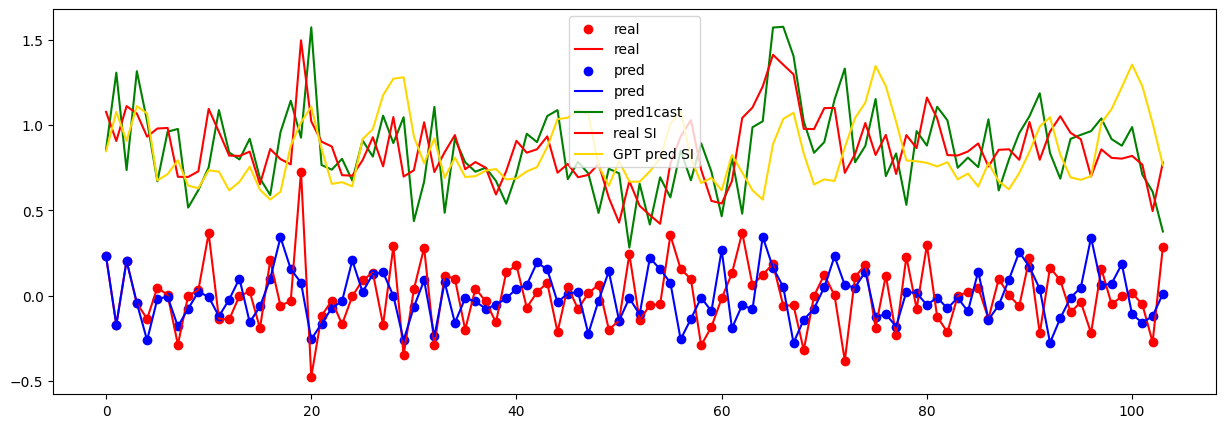

In [14]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 015 to 030


0 train loss =  1.2306898832321167
seq length of pred =  15
500 train loss =  0.06994640082120895
seq length of pred =  15
1000 train loss =  0.027503080666065216
seq length of pred =  15
1500 train loss =  0.019806526601314545
seq length of pred =  15
2000 train loss =  0.011707381345331669
seq length of pred =  15
2500 train loss =  0.009584211744368076
seq length of pred =  15


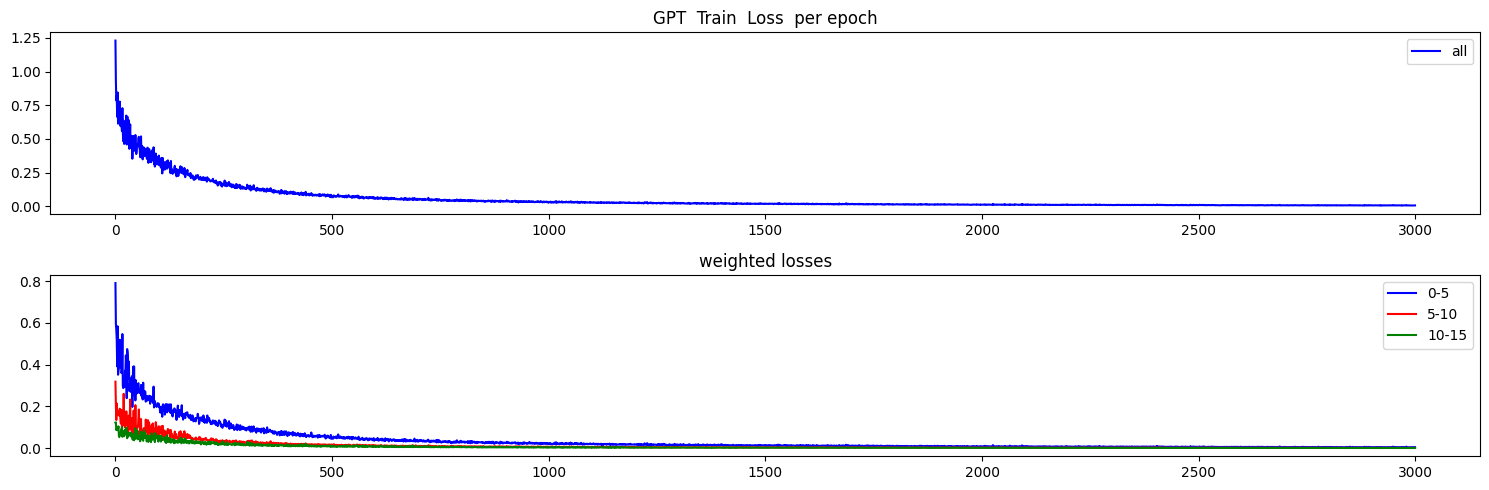

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.09963490068912506
Test MSE Loss - SI only 0-5:  0.4262634217739105
Test MSE Loss - SI only 5-10:  0.02789413556456566
Test MSE Loss - SI only 10-15:  0.06538283824920654
mae, mse, rmse, mape, mspe, rse, corr
(0.21418601, 0.0996349, 0.31564996, 2.3238223, 19.810444, 1.2812153)
Testing R**2 - SI only:  -0.6415127390583748
Testing R**2 - SI only:  -0.6415127390583748
Testing R**2 - All features:  0.8450933180869756


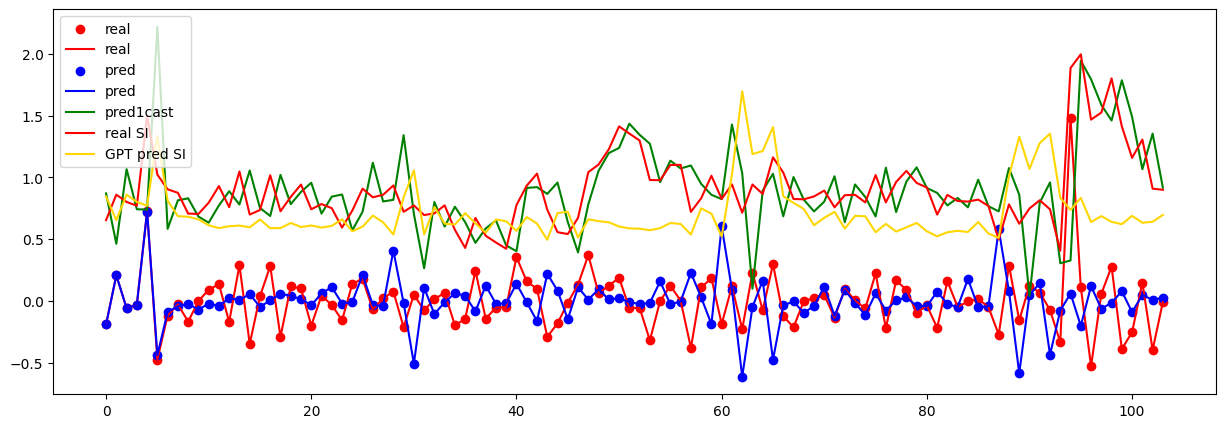

In [15]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 030 to 045


0 train loss =  1.1759111881256104
seq length of pred =  15
500 train loss =  0.07472402602434158
seq length of pred =  15
1000 train loss =  0.03264475613832474
seq length of pred =  15
1500 train loss =  0.018442770466208458
seq length of pred =  15
2000 train loss =  0.012940846383571625
seq length of pred =  15
2500 train loss =  0.009670485742390156
seq length of pred =  15


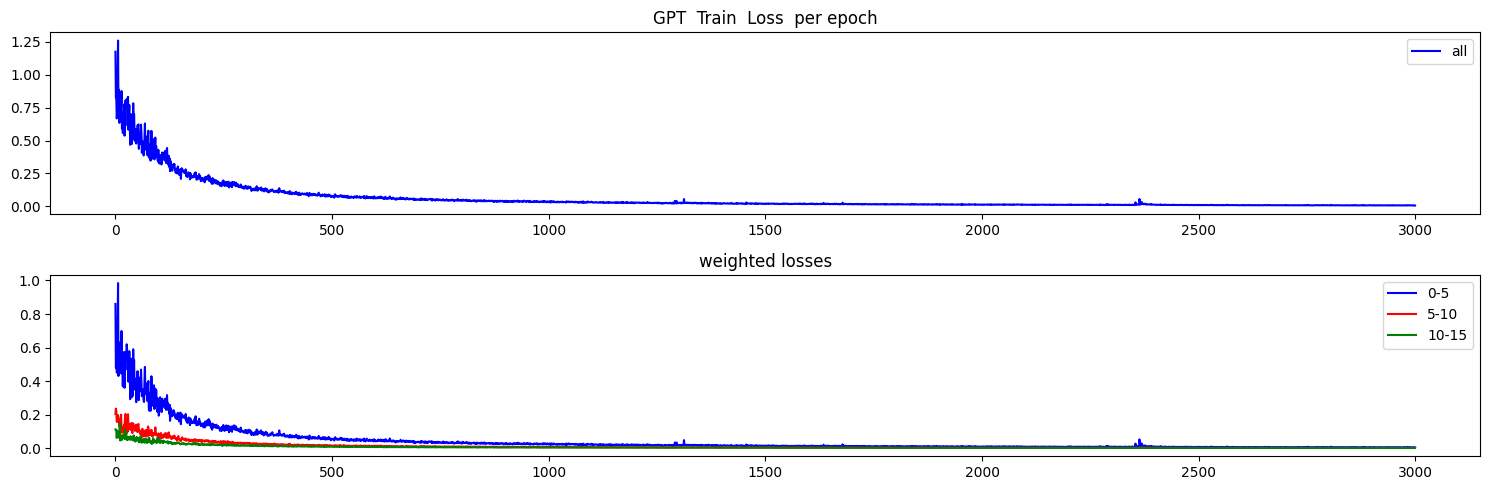

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.06697984784841537
Test MSE Loss - SI only 0-5:  0.028052186593413353
Test MSE Loss - SI only 5-10:  0.017820900306105614
Test MSE Loss - SI only 10-15:  0.033272527158260345
mae, mse, rmse, mape, mspe, rse, corr
(0.18686125, 0.066979855, 0.25880468, 3.1761866, 48.10587, 1.1351907)
Testing R**2 - SI only:  -0.2886579870943815
Testing R**2 - SI only:  -0.2886579870943815
Testing R**2 - All features:  0.8308553585472942


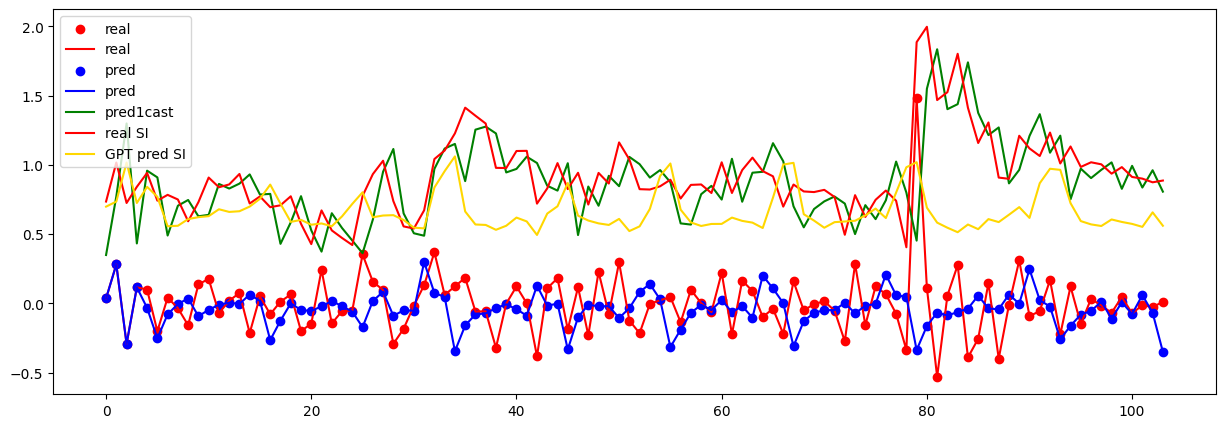

In [16]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 045 to 060


0 train loss =  1.0223045349121094
seq length of pred =  15
500 train loss =  0.0760287195444107
seq length of pred =  15
1000 train loss =  0.03310209885239601
seq length of pred =  15
1500 train loss =  0.018377691507339478
seq length of pred =  15
2000 train loss =  0.014856656081974506
seq length of pred =  15
2500 train loss =  0.009254098869860172
seq length of pred =  15


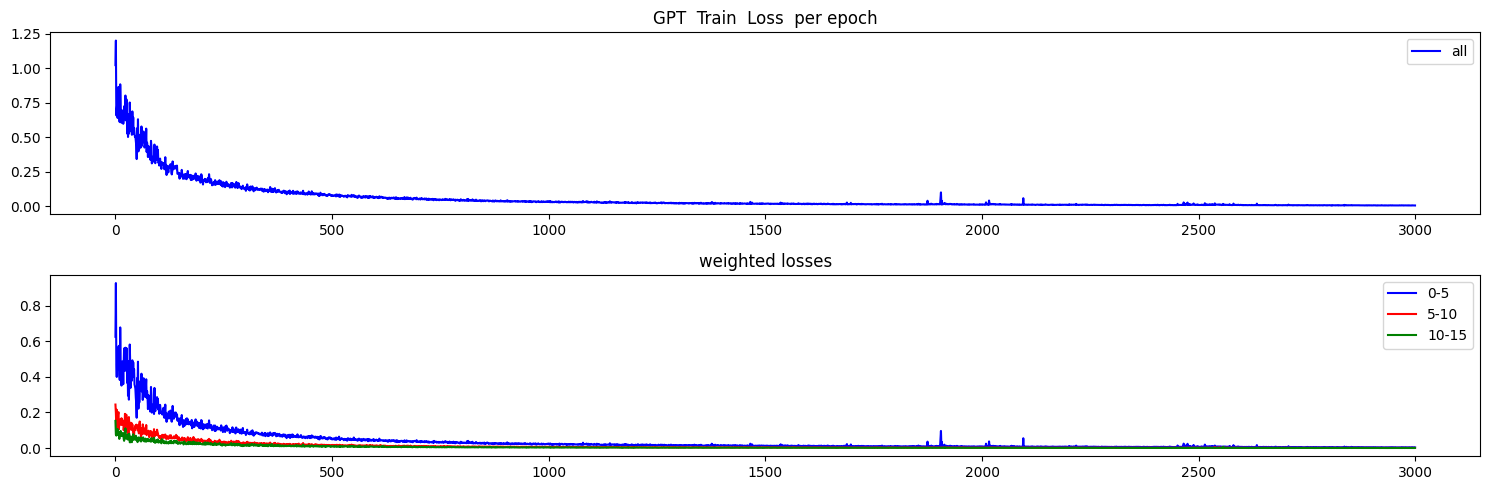

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.07797357439994812
Test MSE Loss - SI only 0-5:  0.08928342163562775
Test MSE Loss - SI only 5-10:  0.048260949552059174
Test MSE Loss - SI only 10-15:  0.07186576724052429
mae, mse, rmse, mape, mspe, rse, corr
(0.1981957, 0.07797359, 0.2792375, 3.9875014, 117.77607, 1.1464266)
Testing R**2 - SI only:  -0.31429383649371756
Testing R**2 - SI only:  -0.31429383649371756
Testing R**2 - All features:  0.827228339840049


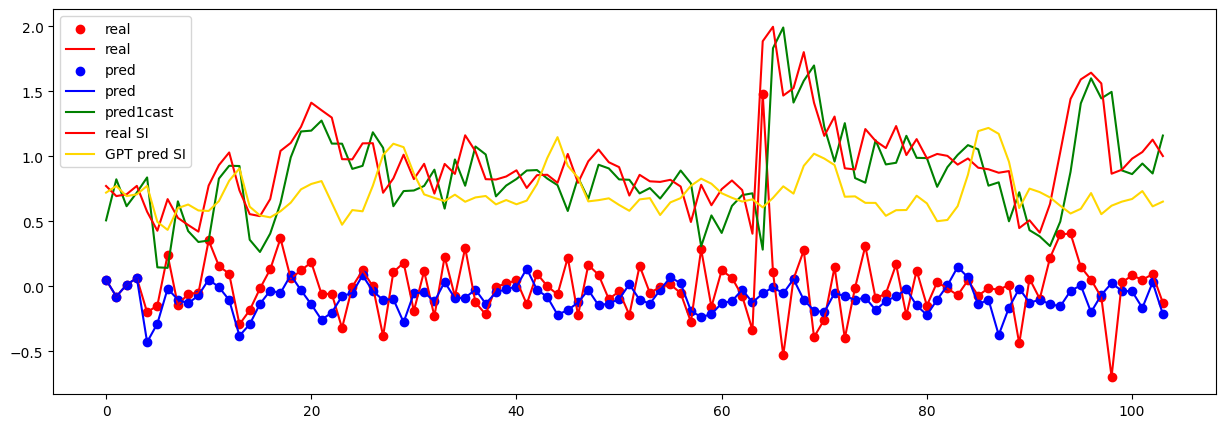

In [17]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 060 to 075


0 train loss =  1.7762553691864014
seq length of pred =  15
500 train loss =  0.07786707580089569
seq length of pred =  15
1000 train loss =  0.03329245001077652
seq length of pred =  15
1500 train loss =  0.02237912081182003
seq length of pred =  15
2000 train loss =  0.012449393048882484
seq length of pred =  15
2500 train loss =  0.009805295616388321
seq length of pred =  15


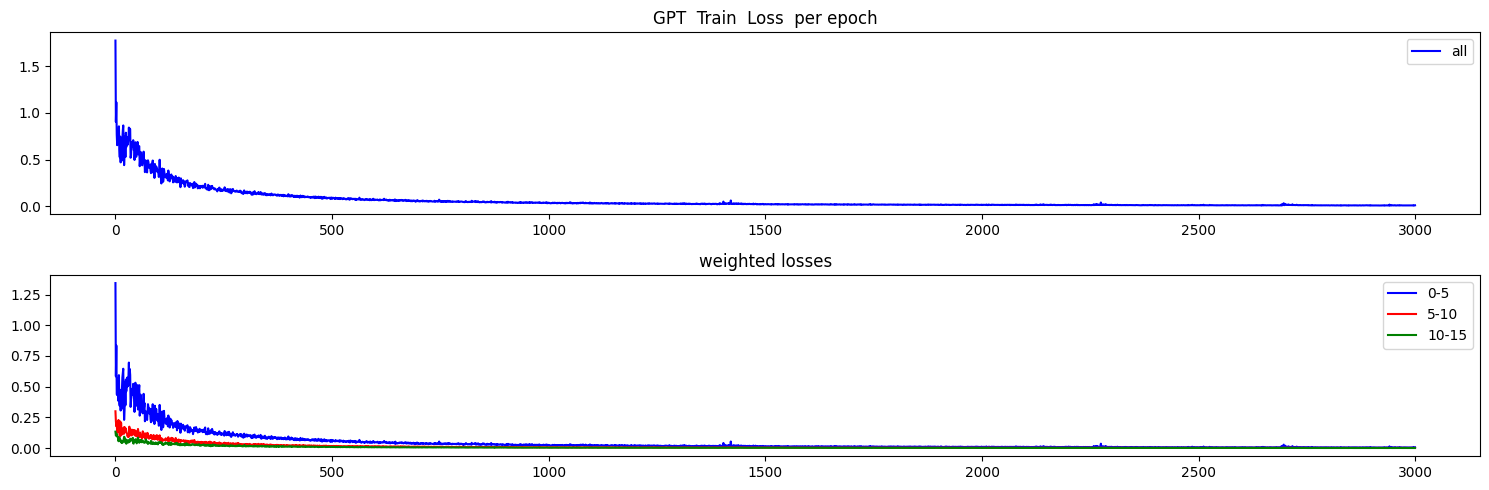

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.08019676804542542
Test MSE Loss - SI only 0-5:  0.04227495938539505
Test MSE Loss - SI only 5-10:  0.04150841385126114
Test MSE Loss - SI only 10-15:  0.0551890954375267
mae, mse, rmse, mape, mspe, rse, corr
(0.21359311, 0.08019677, 0.28319034, 7.3230276, 513.4665, 1.1749749)
Testing R**2 - SI only:  -0.3805657001703624
Testing R**2 - SI only:  -0.3805657001703624
Testing R**2 - All features:  0.7373029623726237


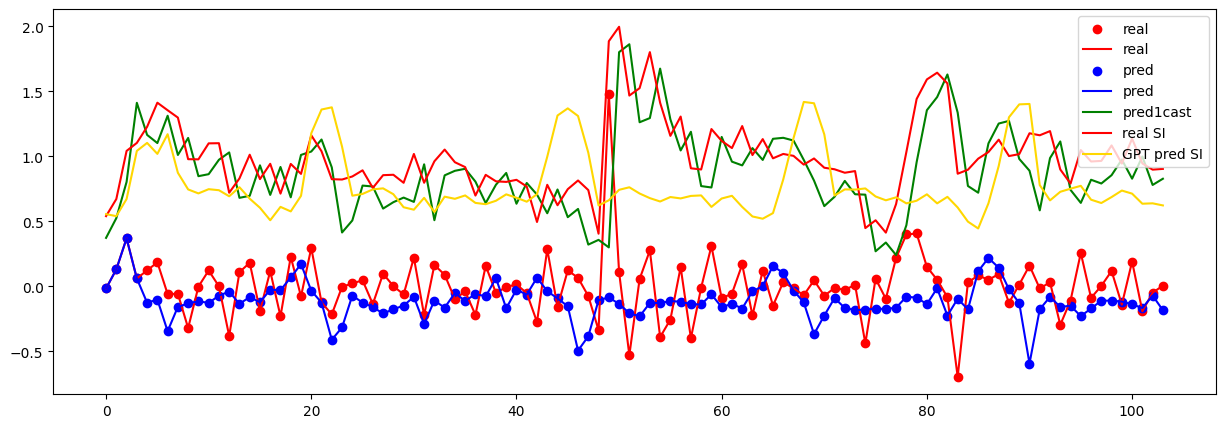

In [18]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 075 to 090


0 train loss =  1.1763510704040527
seq length of pred =  15
500 train loss =  0.09522475302219391
seq length of pred =  15
1000 train loss =  0.0361940898001194
seq length of pred =  15
1500 train loss =  0.023178773000836372
seq length of pred =  15
2000 train loss =  0.012954694218933582
seq length of pred =  15
2500 train loss =  0.010485513135790825
seq length of pred =  15


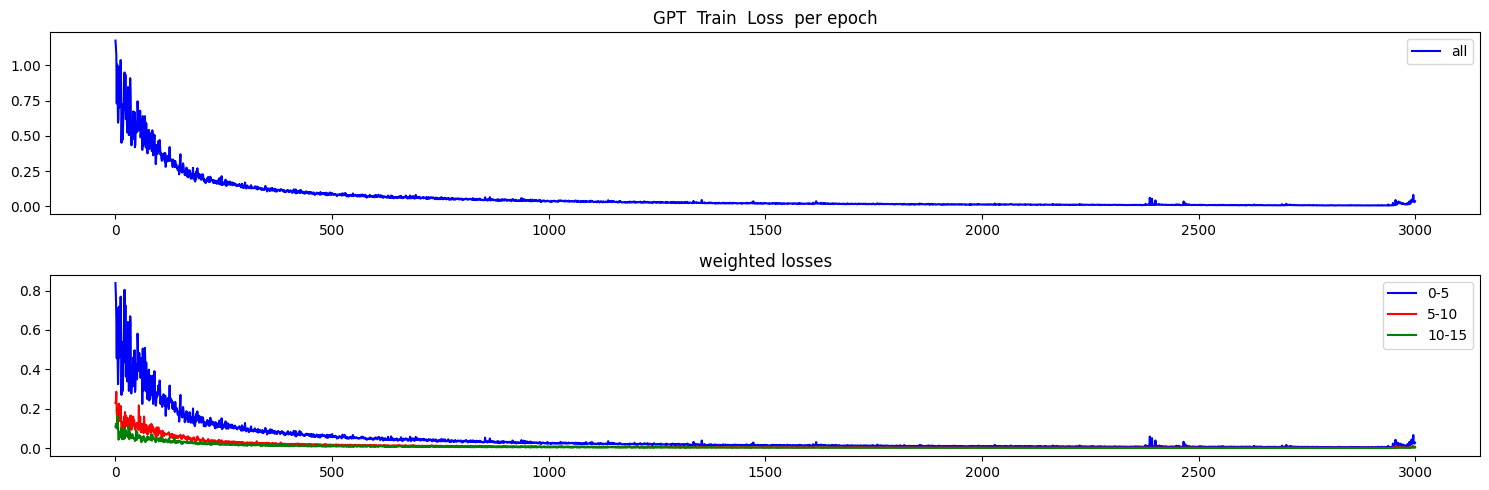

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.09973258525133133
Test MSE Loss - SI only 0-5:  0.09134452044963837
Test MSE Loss - SI only 5-10:  0.04944455996155739
Test MSE Loss - SI only 10-15:  0.10461463034152985
mae, mse, rmse, mape, mspe, rse, corr
(0.24604973, 0.09973257, 0.31580463, 15.378414, 11058.279, 1.3258554)
Testing R**2 - SI only:  -0.7578925305880759
Testing R**2 - SI only:  -0.7578925305880759
Testing R**2 - All features:  0.8510509944743041


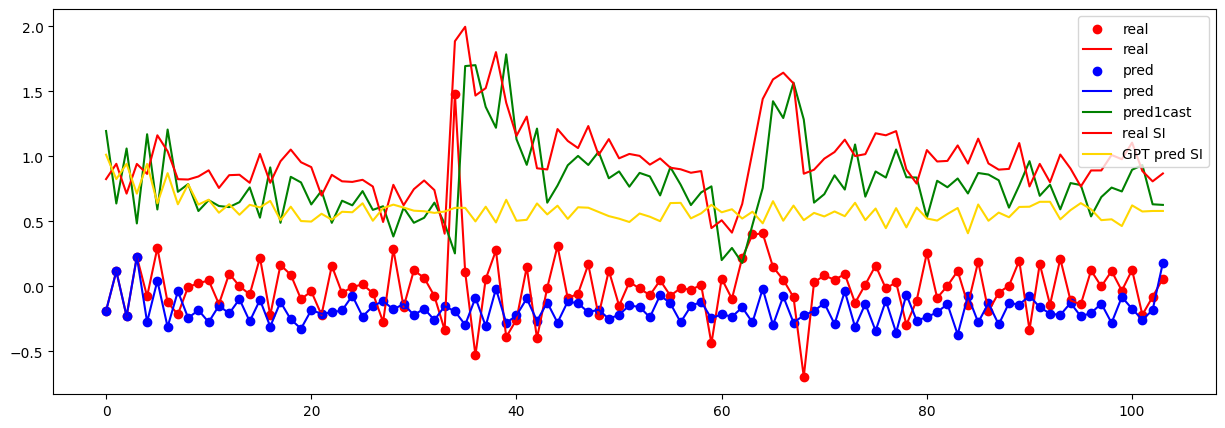

In [19]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## 090 to 105


0 train loss =  1.199730396270752
seq length of pred =  15
500 train loss =  0.11363127082586288
seq length of pred =  15
1000 train loss =  0.039520666003227234
seq length of pred =  15
1500 train loss =  0.02213028073310852
seq length of pred =  15
2000 train loss =  0.012901520356535912
seq length of pred =  15
2500 train loss =  0.009719353169202805
seq length of pred =  15


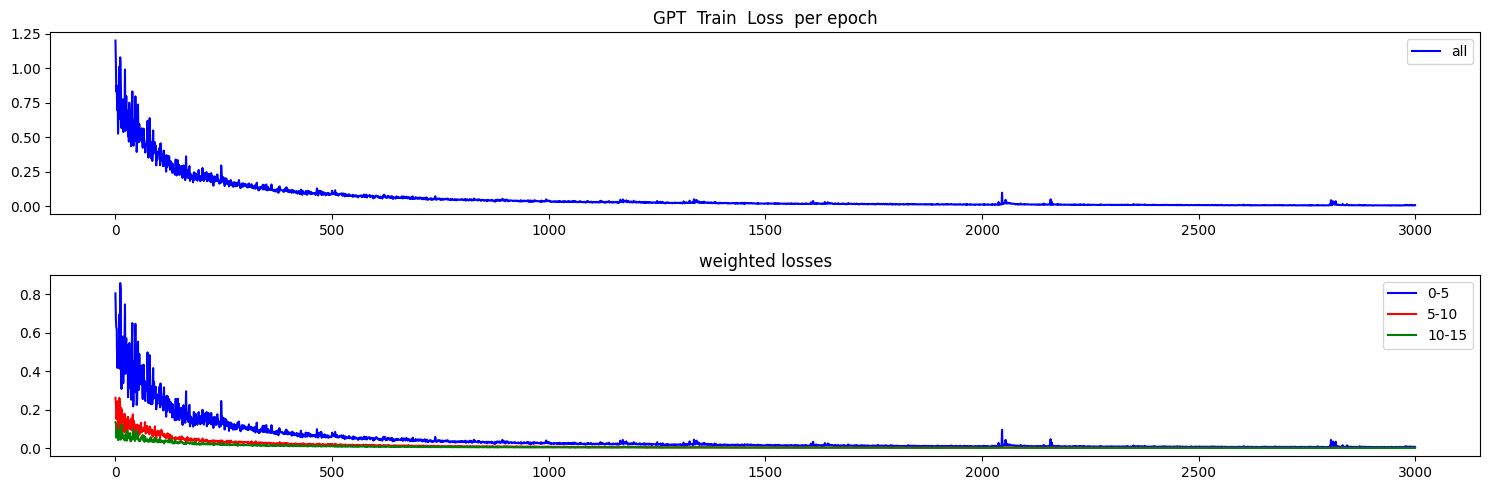

max tokens  99
torch.Size([1, 5, 27])
(104,)
(104,)
Test MSE Loss - SI only:  0.0633355900645256
Test MSE Loss - SI only 0-5:  0.04908479377627373
Test MSE Loss - SI only 5-10:  0.03518448770046234
Test MSE Loss - SI only 10-15:  0.02981131710112095
mae, mse, rmse, mape, mspe, rse, corr
(0.17437528, 0.06333559, 0.25166562, 6.246297, 1881.0597, 1.0592093)
Testing R**2 - SI only:  -0.12192463846627533
Testing R**2 - SI only:  -0.12192463846627533
Testing R**2 - All features:  0.8607808441747865


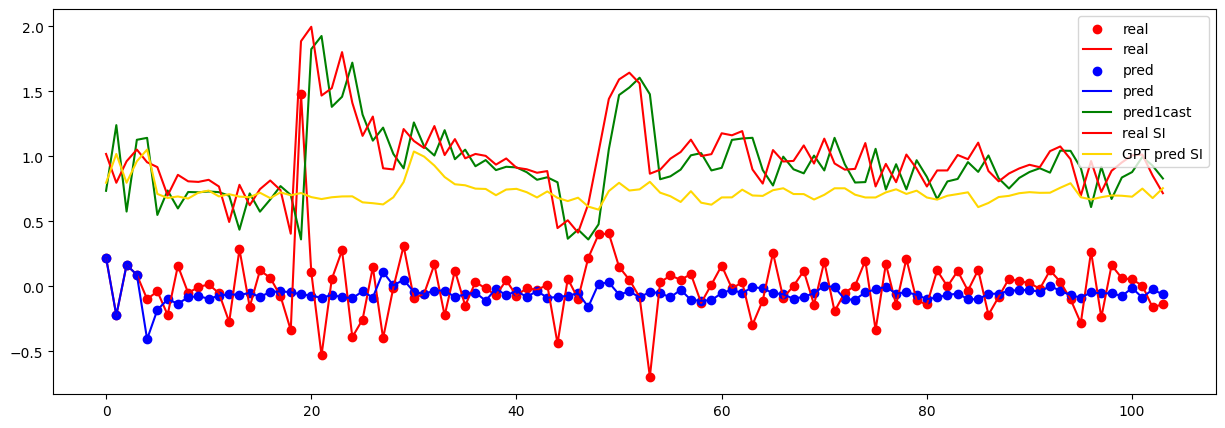

In [20]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 99 )



## Save excel to csv


In [21]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [22]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
